In [ ]:
import matplotlib.pyplot as plt 
import numpy as np


# sigmoidal function that represents dopamine modulation on all areas of network 
def f_mu(X, delta, pars):
    return (1/(np.exp(-pars['mu']*(X-delta))+1)) - 0.5

# sigmoidal function that represents dopamine modulation specifically on nucleus accumbens
def f_lambda(X, delta, pars):
    return (1/(np.exp(-pars['lambda']*(X-delta))+1)) - 0.5

def network(x, t, pars):
    '''
    O = orbitofrontal cortex 
    C = cingulate cortex 
    A = amygdala 
    T = thalamus 
    S = ventral striatum/nucleus accumbens
    delta = dopamine/ventral tegmental area

    '''
    O, C, A, T, S, delta = x

    # dO/dt = -nO + mA + mT + f_mu(O, delta) 
    dO_dt = -pars['n']*O + pars['m']*A + pars['m']*T + f_mu(O,delta,pars)
    
    # dC/dt = mO - nC + mT + f_mu(C, delta)
    dC_dt = pars['m']*O - pars['n']*C + pars['m']*T + f_mu(C,delta,pars)

    # dA/dt = -aO - aC - n_A*A + mT + m*delta + f_mu(A, delta)
    dA_dt = -pars['a']*O - pars['a']*C - pars['nA']*A + pars['m']*T + pars['m']*delta + f_mu(A,delta,pars)

    # dT/dt = mO + mC + mA - nT + mS + f_mu(T, delta) + 1
    dT_dt = pars['m']*O + pars['m']*C + pars['m']*A - pars['n']*T + pars['m']*S + f_mu(T,delta,pars) + 1

    # dS/dt = b1*O + b2*A + mT - nS - m*delta + f_lambda(S, delta)
    dS_dt = pars['b1']*O + pars['b2']*A + pars['m']*T - pars['n']*S - pars['m']*delta + f_lambda(S,delta,pars)

    # ddelta/dt = m(O + C + A + T + S) - n*delta 

    ddelta_dt = pars['m']*(O + C + A + T + S) - pars['n']*delta

    return (dO_dt, dC_dt, dA_dt, dT_dt, dS_dt, ddelta_dt)


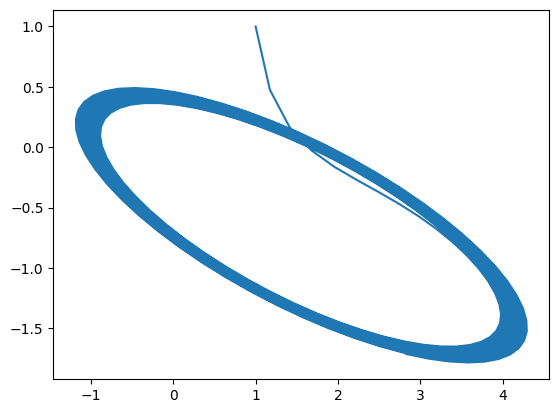

In [47]:
# REPRODUCING FIG 2 
from scipy import integrate

pars = {} 
pars['mu'] = 0.1 # dopamine sensitivity
pars['lambda'] = 0.1 # dopamine sensitivty of nucleus accumbens

pars['nA'] = 1.4 # amygdala self-inhibition strength 
pars['n'] = 1.4 # nA = n

pars['a'] = 2 # corticol inhibition of amygdala strength  
pars['b1'] = 1.2 
pars['b2'] = 1.2 
pars['m'] = 1 

# INITIAL STATE
# O, C, A, T, S, delta = x
x = (1, 1, 1, 1, 1, 1)
t = np.linspace(0, 200, 1000)
data = integrate.odeint(network, x, t, args=(pars,))

# Why does the spiral look different lol 
plt.plot(data[:,1], data[:,2])

